# Deep Learning: GANs and Autoencoders

This notebook demonstrates advanced deep learning architectures for generative AI and dimensionality reduction:

## 🎯 Learning Objectives
- **Understand** the architecture and training process of GANs
- **Implement** Generative Adversarial Networks for image generation
- **Build** Autoencoders for data compression and reconstruction
- **Compare** different generative modeling approaches

## 📚 Techniques Covered
1. **Generative Adversarial Networks (GANs)** - Creating realistic synthetic data
2. **Autoencoders** - Learning efficient data representations and reconstruction

Introduction
Imagine creating photorealistic images of people who don't exist, or generating lifelike audio of speeches never actually given. These are real applications of Generative Adversarial Networks, or GANs. And what if you could compress vast amounts of data while preserving its essential features? That's where Autoencoders come in. In this reading, we'll dive into these powerful AI techniques that are revolutionizing everything from art creation to data compression.

By the end of this reading, you’ll be able to: 

explain how GANs and Autoencoders work.

implement basic models for GANs and Autoencoders.

train and evaluate GANs and Autoencoders for AI tasks.

## 🚀 Part 1: Generative Adversarial Networks (GANs)

### What are GANs?
**Generative Adversarial Networks** consist of two neural networks competing against each other:

- **Generator**: Creates fake data (tries to fool the discriminator)
- **Discriminator**: Distinguishes between real and fake data (tries to catch the generator)

### The GAN Training Process
1. **Generator** creates fake images from random noise
2. **Discriminator** learns to classify real vs fake images
3. Both networks improve through adversarial training
4. Eventually, generator creates realistic images that fool the discriminator

### Architecture Overview
- **Input**: Random noise vector (100 dimensions)
- **Generator Output**: 28×28 grayscale images (MNIST digits)
- **Discriminator Output**: Probability score (real vs fake)

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the generator model
def build_generator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(100,)),
        layers.Dense(784, activation='sigmoid')  # Output: 28x28 flattened image
    ])
    return model

# Define the discriminator model
def build_discriminator():
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),  # Input: Flattened 28x28 image
        layers.Dense(1, activation='sigmoid')  # Output: Probability (real or fake)
    ])
    return model

### 🏗️ GAN Architecture Implementation

Let's build the two competing networks:

In [5]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load and preprocess dataset (MNIST for example)
(X_train, _), (_, _) = mnist.load_data()

# Normalize images to [-1, 1] and flatten to (784,) for the discriminator input
X_train = (X_train.astype(np.float32) - 127.5) / 127.5  # Normalize to range [-1, 1]
X_train = X_train.reshape(-1, 784)  # Flatten 28x28 images to vectors of size 784

# Check the shape of the dataset
print(f"X_train shape: {X_train.shape}")  # Should print: (60000, 784)

# Build the models
generator = build_generator()
discriminator = build_discriminator()

# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create GAN model: stack generator and discriminator
gan = models.Sequential([generator, discriminator])
discriminator.trainable = False  # Freeze the discriminator when training the GAN

gan.compile(optimizer='adam', loss='binary_crossentropy')

# Training loop
epochs = 1000
batch_size = 32
half_batch = batch_size // 2

for epoch in range(epochs):
    # Train discriminator with real images
    idx = np.random.randint(0, X_train.shape[0], half_batch)  # Random real images
    real_imgs = X_train[idx]
    real_labels = np.ones((half_batch, 1))  # Real labels (1s)

    # Train discriminator with fake images
    noise = np.random.normal(0, 1, (half_batch, 100))  # Random noise input
    fake_imgs = generator.predict(noise)  # Fake images generated by the generator
    fake_labels = np.zeros((half_batch, 1))  # Fake labels (0s)

    # Train the discriminator on real and fake images
    d_loss_real = discriminator.train_on_batch(real_imgs, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_labels)

    # Train the generator (the generator wants to fool the discriminator)
    noise = np.random.normal(0, 1, (batch_size, 100))  # Generate new noise
    gan_labels = np.ones((batch_size, 1))  # We want the generator to produce "real" images
    g_loss = gan.train_on_batch(noise, gan_labels)

    # Log progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss_real[0]}, Generator Loss: {g_loss}")

X_train shape: (60000, 784)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 0, Discriminator Loss: 0.35566192865371704, Generator Loss: 0.3389207720756531
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Epoch 0, Discriminator Loss: 0.35566192865371704, Generator Loss: 0.3389207720756531
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 

### 🖼️ Visualizing Generated Images

Let's see what our GAN has learned to generate:

AttributeError: EagerTensor object has no attribute 'reshape'. 
        If you are looking for numpy-related methods, please run the following:
        tf.experimental.numpy.experimental_enable_numpy_behavior()
      

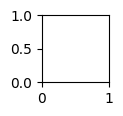

In [7]:
import matplotlib.pyplot as plt

# Generate some images using the trained generator
def generate_and_save_images(generator, epoch, test_input):
    predictions = generator(test_input, training=False)
    
    fig = plt.figure(figsize=(4, 4))
    
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :].reshape(28, 28) * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Generate sample images
noise = np.random.normal(0, 1, (16, 100))
generate_and_save_images(generator, 0, noise)

## 🔄 Part 2: Autoencoders

### What are Autoencoders?
**Autoencoders** are neural networks designed to learn efficient representations of data:

- **Encoder**: Compresses input data into a lower-dimensional representation (latent space)
- **Decoder**: Reconstructs the original data from the compressed representation

### Key Applications
- **Data Compression**: Reduce storage requirements
- **Denoising**: Remove noise from images
- **Anomaly Detection**: Identify unusual patterns
- **Feature Learning**: Learn meaningful data representations

### Architecture Overview
- **Input**: Original image (28×28 = 784 dimensions)
- **Bottleneck**: Compressed representation (64 dimensions)  
- **Output**: Reconstructed image (784 dimensions)

### 🏗️ Autoencoder Implementation

In [8]:
# Define the Autoencoder architecture
def build_autoencoder():
    # Encoder
    encoder = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),  # Bottleneck layer (latent representation)
    ])
    
    # Decoder  
    decoder = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(64,)),
        layers.Dense(256, activation='relu'),
        layers.Dense(784, activation='sigmoid')  # Output layer (reconstructed image)
    ])
    
    # Complete Autoencoder
    autoencoder = models.Sequential([encoder, decoder])
    
    return autoencoder, encoder, decoder

# Build the autoencoder
autoencoder, encoder, decoder = build_autoencoder()

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

print("Autoencoder Architecture:")
autoencoder.summary()

Autoencoder Architecture:


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 64)             │       242,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (None, 784)            │       242,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 484,944 (1.85 MB)

 Trainable params: 484,944 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

### 🎯 Training the Autoencoder

Training data shape: (60000, 784)
Test data shape: (10000, 784)
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.2146 - val_loss: 0.1385
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.2146 - val_loss: 0.1385
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1249 - val_loss: 0.1125
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1249 - val_loss: 0.1125
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1081 - val_loss: 0.1020
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1081 - val_loss: 0.1020
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1006 - val_loss: 0.0974
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1006 - val_loss: 0.0974
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0960 - val_loss: 0.0937
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0960 - val_loss: 0.0937
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.092

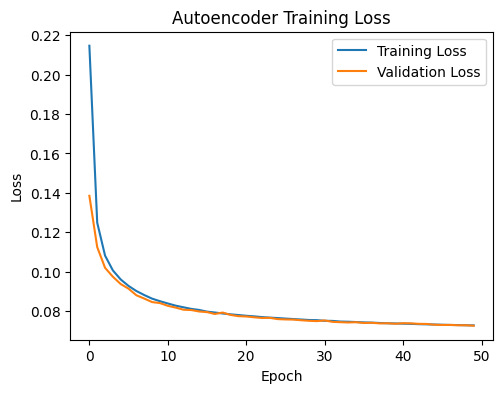

In [9]:
# Prepare data for autoencoder (normalize to [0,1])
(X_train_ae, _), (X_test_ae, _) = mnist.load_data()
X_train_ae = X_train_ae.astype('float32') / 255.0
X_test_ae = X_test_ae.astype('float32') / 255.0
X_train_ae = X_train_ae.reshape(-1, 784)
X_test_ae = X_test_ae.reshape(-1, 784)

print(f"Training data shape: {X_train_ae.shape}")
print(f"Test data shape: {X_test_ae.shape}")

# Train the autoencoder
history = autoencoder.fit(X_train_ae, X_train_ae,  # Input = Output for reconstruction
                         epochs=50, 
                         batch_size=256,
                         shuffle=True,
                         validation_data=(X_test_ae, X_test_ae))

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 🔍 Visualizing Autoencoder Results

In [ ]:
# Test the autoencoder on some images
n_images = 10
test_images = X_test_ae[:n_images]
reconstructed_images = autoencoder.predict(test_images)

# Visualize original vs reconstructed images
plt.figure(figsize=(15, 6))

for i in range(n_images):
    # Original images
    plt.subplot(2, n_images, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    # Reconstructed images
    plt.subplot(2, n_images, i + 1 + n_images)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Show compression ratio
original_size = 784
compressed_size = 64
compression_ratio = original_size / compressed_size
print(f"Compression Ratio: {compression_ratio:.1f}x")
print(f"Original size: {original_size} → Compressed size: {compressed_size}")

## 📊 Comparison: GANs vs Autoencoders

| Aspect | GANs | Autoencoders |
|--------|------|--------------|
| **Purpose** | Generate new data | Compress & reconstruct data |
| **Training** | Adversarial (2 networks) | Reconstruction loss |
| **Output** | Novel synthetic data | Reconstructed input data |
| **Applications** | Art, data augmentation | Compression, denoising |
| **Evaluation** | Subjective quality | Reconstruction error |

## 🎯 Key Takeaways

### GANs
- ✅ **Strengths**: Generate highly realistic new data
- ❌ **Challenges**: Training instability, mode collapse
- 🎯 **Best for**: Creating new content, data augmentation

### Autoencoders  
- ✅ **Strengths**: Stable training, good compression
- ❌ **Challenges**: Limited to reconstruction tasks
- 🎯 **Best for**: Data compression, anomaly detection, denoising

## 🚀 Next Steps
- Experiment with **Variational Autoencoders (VAEs)** 
- Try **Conditional GANs** for controlled generation
- Explore **DCGAN** for better image quality
- Implement **Denoising Autoencoders** for noise removal

### 🎯 GAN Training Process

Now let's implement the adversarial training loop where both networks compete:

**Training Steps:**
1. **Train Discriminator**: Show it real and fake images
2. **Train Generator**: Try to fool the discriminator
3. **Repeat**: Until generator creates realistic images

In [10]:
# Define the encoder
def build_encoder():
    input_img = layers.Input(shape=(784,))
    encoded = layers.Dense(128, activation='relu')(input_img)
    encoded = layers.Dense(64, activation='relu')(encoded)
    return models.Model(input_img, encoded)

# Define the decoder
def build_decoder():
    encoded_input = layers.Input(shape=(64,))
    decoded = layers.Dense(128, activation='relu')(encoded_input)
    decoded = layers.Dense(784, activation='sigmoid')(decoded)
    return models.Model(encoded_input, decoded)

# Build the full autoencoder
encoder = build_encoder()
decoder = build_decoder()

input_img = layers.Input(shape=(784,))
encoded_img = encoder(input_img)
decoded_img = decoder(encoded_img)

autoencoder = models.Model(input_img, decoded_img)

Training autoencoder...
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0547 - val_loss: 0.0279
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0547 - val_loss: 0.0279
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0222 - val_loss: 0.0177
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0222 - val_loss: 0.0177
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0161 - val_loss: 0.0140
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0161 - val_loss: 0.0140
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0135 - val_loss: 0.0121
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0135 - val_loss: 0.0121
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0105 - val_loss: 0.0096
Epoch 7/50
235/235 

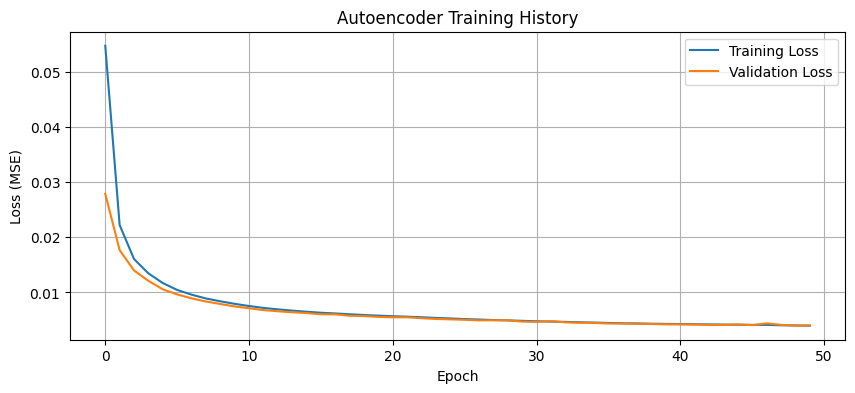

In [13]:
# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Use the correctly prepared data (X_train_ae, X_test_ae) that were normalized to [0,1]
print("Training autoencoder...")
history = autoencoder.fit(X_train_ae, X_train_ae,  # Use the autoencoder data
                         epochs=50, 
                         batch_size=256,
                         shuffle=True,
                         validation_data=(X_test_ae, X_test_ae))

print("Training completed!")

# Plot training progress
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()